In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv(r"churn_prediction.csv")
data.shape

(28382, 21)

In [2]:
data.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


### Imputing missing values

In [3]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [4]:
#missing values of gender
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [5]:
data["gender"].fillna("Male",inplace=True)

In [6]:
#missing values of dependents
mode=data["dependents"].mode()[0]
mode

0.0

In [7]:
data["dependents"].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [8]:
#dependent having grater than 7 value are error
data["dependents"].fillna(0.0,inplace=True)

In [9]:
data[data["dependents"]>6.0].shape

(10, 21)

In [10]:
#there will be not more effect on droppping this data
data.drop(data[data["dependents"]>6.0].index, inplace = True)

In [11]:
#missing values of occupation
data["occupation"].value_counts()

self_employed    17469
salaried          6701
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [12]:
data["occupation"].fillna(data["occupation"].mode()[0],inplace=True)

In [13]:
#missing values of city 
data["city"].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
689.0        1
1567.0       1
1293.0       1
451.0        1
1191.0       1
Name: city, Length: 1604, dtype: int64

In [14]:
data["city"].fillna(data["city"].mode()[0],inplace=True)

In [15]:
np.mean(data["days_since_last_transaction"])

70.00854904767586

In [16]:
data["days_since_last_transaction"].fillna(np.mean(data["days_since_last_transaction"]),inplace=True)

### Univariate analysis of data

In [17]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [18]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

#### Dealing with object tyoe data

In [19]:
columns=["gender","occupation"]
for i in columns:
    print("Value counts in ",i)
    print(data[i].value_counts())
    print("\n")

Value counts in  gender
Male      17064
Female    11308
Name: gender, dtype: int64


Value counts in  occupation
self_employed    17549
salaried          6701
student           2058
retired           2024
company             40
Name: occupation, dtype: int64




There is no error in filling of data

#### Graphical analysis

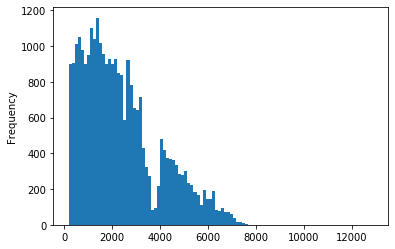

In [20]:
data["vintage"].plot(kind="hist",bins=100)

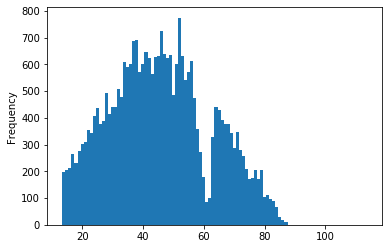

In [21]:
#graph is left skewed and need to make symmetrical 
np.sqrt(data["vintage"]).plot(kind="hist",bins=100)

In [22]:
#less number of outliers will be present in this modified vintage set
data["vintage"]=np.sqrt(data["vintage"])

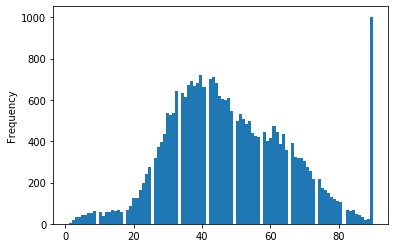

In [23]:
data["age"].plot(kind="hist",bins=100)

In [24]:
#There is large number of people at age of 90
#hence this acts as outlier
data.drop(data[data["age"]==90].index,inplace=True)

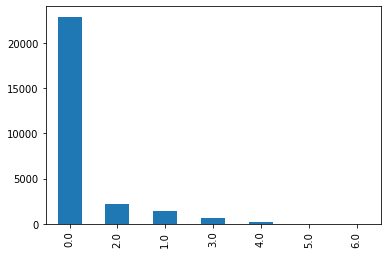

In [25]:
data["dependents"].value_counts().plot(kind="bar")

Large number of customers has zero dependents

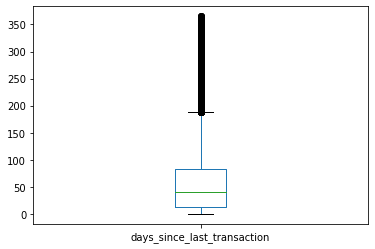

In [26]:
data["days_since_last_transaction"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


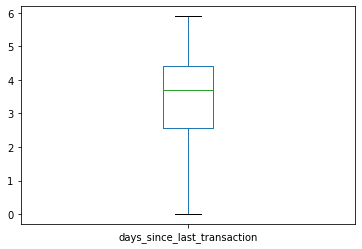

In [27]:
np.log(data["days_since_last_transaction"]).plot(kind="box")

In [28]:
#log transform reduce the outliers and hence this transform can be implemented
data["days_since_last_transaction"]=np.log(data["days_since_last_transaction"])

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


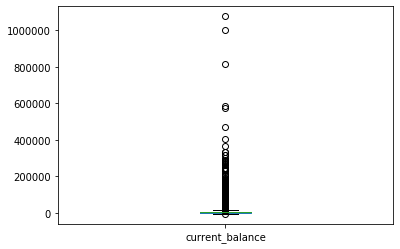

In [29]:
data["current_balance"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


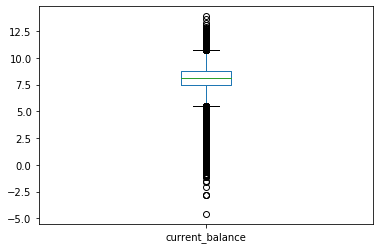

In [92]:
np.log(data["current_balance"]).plot(kind="box")

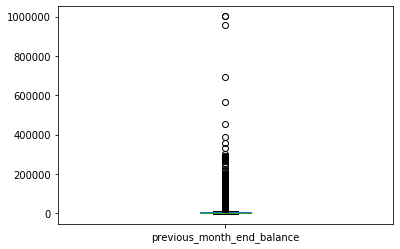

In [31]:
data["previous_month_end_balance"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


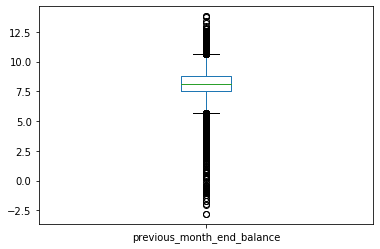

In [32]:
np.log(data["previous_month_end_balance"]).plot(kind="box")

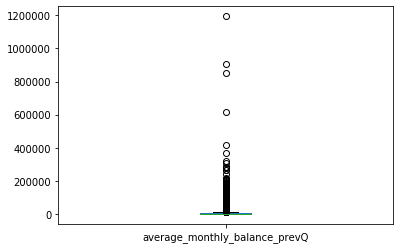

In [33]:
data["average_monthly_balance_prevQ"].plot(kind="box")

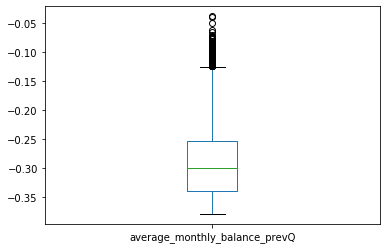

In [95]:
np.log(data["average_monthly_balance_prevQ"]).plot(kind="box")

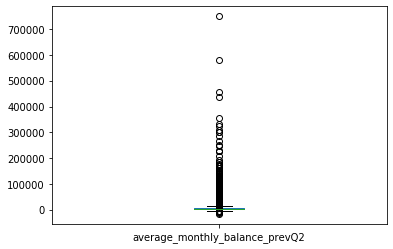

In [35]:
data["average_monthly_balance_prevQ2"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


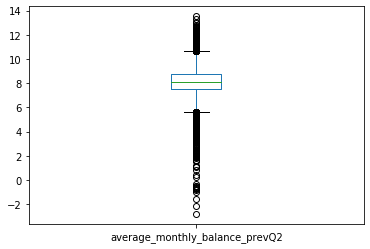

In [36]:
np.log(data["average_monthly_balance_prevQ2"]).plot(kind="box")

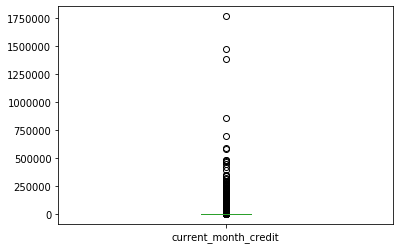

In [37]:
data["current_month_credit"].plot(kind="box")

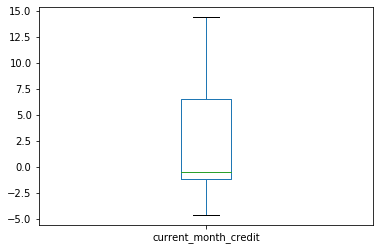

In [38]:
np.log(data["current_month_credit"]).plot(kind="box")

In [39]:
#there is significant change in outlier and can be considered
data["current_month_credit"]=np.log(data["current_month_credit"])

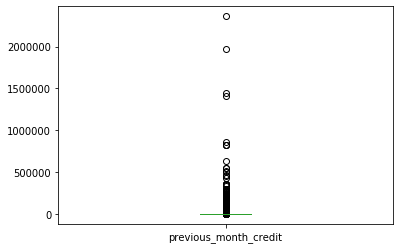

In [40]:
data["previous_month_credit"].plot(kind="box")

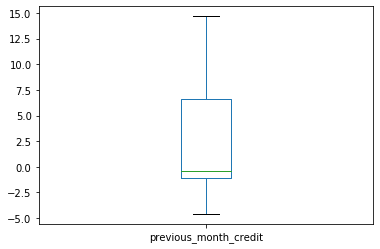

In [41]:
np.log(data["previous_month_credit"]).plot(kind="box")

In [42]:
#Here too has significant cange in outliers
data["previous_month_credit"]=np.log(data["previous_month_credit"])

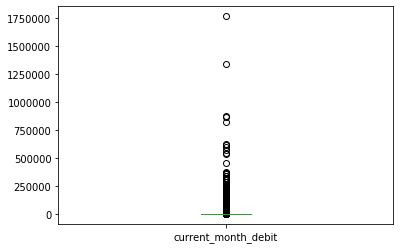

In [43]:
data["current_month_debit"].plot(kind="box")

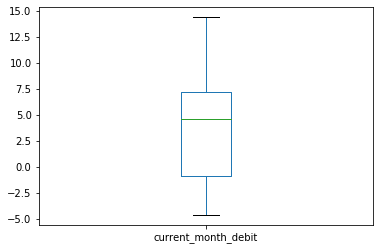

In [44]:
np.log(data["current_month_debit"]).plot(kind="box")

In [45]:
data["current_month_debit"]=np.log(data["current_month_debit"])

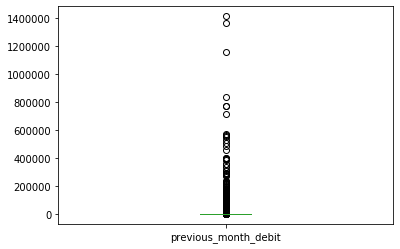

In [46]:
data["previous_month_debit"].plot(kind="box")

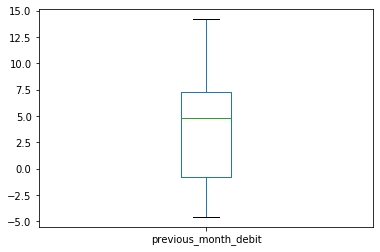

In [47]:
np.log(data["previous_month_debit"]).plot(kind="box")

In [48]:
data["previous_month_debit"]=np.log(data["previous_month_debit"])

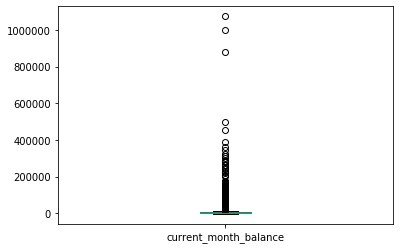

In [49]:
data["current_month_balance"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


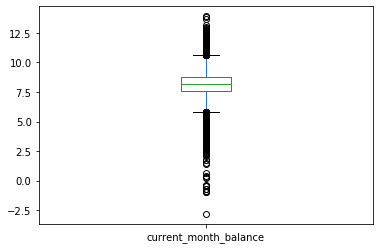

In [50]:
np.log(data["current_month_balance"]).plot(kind="box")

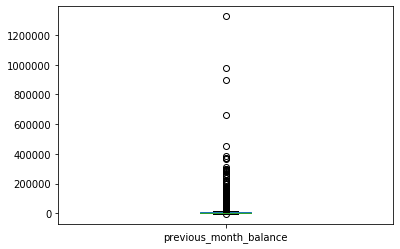

In [51]:
data["previous_month_balance"].plot(kind="box")

D:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


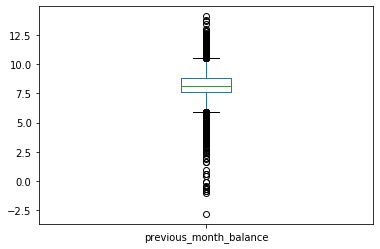

In [52]:
np.log(data["previous_month_balance"]).plot(kind="box")

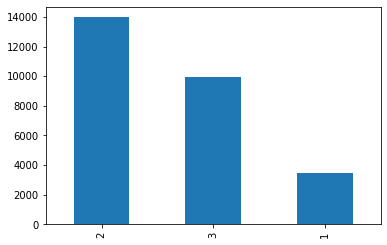

In [53]:
data["customer_nw_category"].value_counts().plot(kind="bar")

Medium is the common net worth of customers

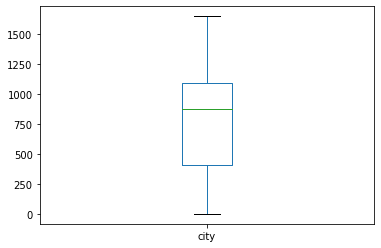

In [54]:
data["city"].plot(kind="box")

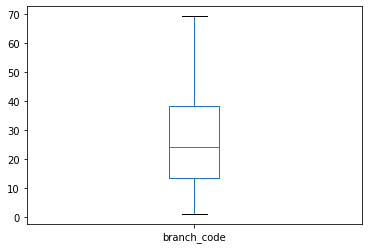

In [55]:
np.sqrt(data["branch_code"]).plot(kind="box")

In [56]:
data["branch_code"]=np.sqrt(data["branch_code"])

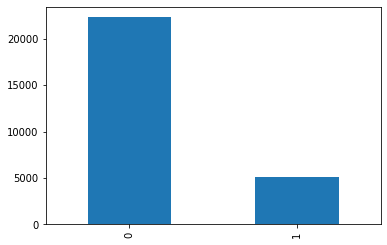

In [57]:
data["churn"].value_counts().plot(kind="bar")

### Bivariate Analysis of Data

In [58]:
data.groupby("gender").churn.value_counts()

gender  churn
Female  0         9235
        1         1968
Male    0        13052
        1         3114
Name: churn, dtype: int64

In [59]:
data.groupby("occupation").churn.value_counts()

occupation     churn
company        0           17
               1            3
retired        0         1671
               1          298
salaried       0         5550
               1         1145
self_employed  0        13315
               1         3312
student        0         1734
               1          324
Name: churn, dtype: int64

In [60]:
data.groupby("occupation").gender.value_counts()

occupation     gender
company        Male        14
               Female       6
retired        Male      1591
               Female     378
salaried       Male      4859
               Female    1836
self_employed  Male      8650
               Female    7977
student        Male      1052
               Female    1006
Name: gender, dtype: int64

### Implementing models

In [61]:
data.shape

(27369, 21)

In [62]:
data=pd.get_dummies(data)

In [63]:
data.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,55.991071,66,0.0,187.0,2,27.477263,5.411646,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,17.606817,35,0.0,1020.0,2,56.692151,4.094345,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,48.538644,31,0.0,146.0,2,6.403124,4.248617,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
4,6,50.309045,42,2.0,1494.0,3,19.697716,4.060443,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,7,16.217275,42,0.0,1096.0,2,40.816663,4.094345,15202.20,16059.34,...,15719.44,15349.75,0,1,0,0,0,0,1,0


In [64]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [65]:
#deleting unnecessory feature
data.drop("customer_id",axis=1,inplace=True)

In [66]:
df=pd.DataFrame()
df["max"]=data.max()
df["min"]=data.min()
df

,max,min
vintage,1.135738e+02,1.341641e+01
age,8.900000e+01,1.000000e+00
dependents,6.000000e+00,0.000000e+00
city,1.649000e+03,0.000000e+00
customer_nw_category,3.000000e+00,1.000000e+00
branch_code,6.915201e+01,1.000000e+00
days_since_last_transaction,5.899897e+00,-inf
current_balance,1.076091e+06,-5.503960e+03
previous_month_end_balance,1.001124e+06,-3.145380e+03
average_monthly_balance_prevQ,1.192704e+06,1.428690e+03


In [67]:
data[data["days_since_last_transaction"]<0]

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
9,58.129167,40,3.0,1020.0,2,6.164414,-inf,4957.95,4244.38,2168.53,...,1823.16,2416.69,0,0,1,0,0,0,1,0
16,52.182373,49,0.0,1125.0,3,31.984371,-inf,1448.49,3183.27,3021.27,...,1950.95,3127.00,1,0,1,0,0,0,1,0
56,27.092434,44,0.0,759.0,3,50.299105,-inf,91.47,926.03,2839.76,...,806.65,3892.54,1,0,1,0,0,0,1,0
74,79.018985,70,0.0,1020.0,1,1.000000,-inf,54686.70,19568.00,20354.78,...,27917.15,17771.80,0,0,1,0,0,1,0,0
99,56.053546,43,3.0,834.0,2,36.810325,-inf,10152.97,1699.27,3216.92,...,5369.79,1571.78,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28331,64.505814,47,0.0,1111.0,2,9.380832,-inf,3323.49,3412.16,3189.97,...,3171.53,3358.12,0,0,1,0,0,1,0,0
28336,71.316197,49,2.0,833.0,2,12.806248,-inf,-1149.80,-1980.92,3676.33,...,4152.46,3320.63,0,0,1,0,0,0,1,0
28347,65.207362,72,0.0,1020.0,3,15.066519,-inf,2334.70,3799.21,2728.76,...,3309.38,2475.24,0,1,0,0,1,0,0,0
28356,55.217751,47,2.0,231.0,2,27.092434,-inf,10701.89,2.07,2173.29,...,5396.60,303.47,0,0,1,0,0,0,1,0


In [68]:
#droppping the rows in which since last day transction is -infinity
data.drop(data[data["days_since_last_transaction"]<0].index,inplace=True)

In [69]:
#identify target variable
feature=data.drop("churn",axis=1)
target=data["churn"]

In [70]:
columns=feature.columns
scale=MinMaxScaler()
feature=scale.fit_transform(feature)
feature=pd.DataFrame(feature,columns=columns)
feature.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.425078,0.738636,0.000000,0.113402,0.5,0.388503,0.917244,0.006437,0.004585,0.000033,...,0.161329,0.004483,0.006751,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.041838,0.386364,0.000000,0.618557,0.5,0.817176,0.693969,0.010072,0.011800,0.007053,...,0.496305,0.009157,0.014214,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.350671,0.340909,0.000000,0.088539,0.5,0.079280,0.720117,0.008707,0.008923,0.003854,...,0.547302,0.007774,0.010429,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.368347,0.465909,0.333333,0.906004,1.0,0.274353,0.688223,0.005946,0.004528,0.000238,...,0.643191,0.004203,0.006974,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.027965,0.465909,0.000000,0.664645,0.5,0.584233,0.693969,0.019144,0.019123,0.015258,...,0.552608,0.017712,0.020895,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
#dividing the data into train and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature,target,random_state=100,stratify=target,test_size=0.2)

In [72]:
#importing logistice regressor
from sklearn.linear_model import LogisticRegression as LR
lr=LR()
lr.fit(train_x,train_y)
print("Score of model on train set in LR is :",lr.score(train_x,train_y))

Score of model on train set in LR is : 0.8149640706933385


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
print("Score of model on test set in LR is :",lr.score(test_x,test_y))

Score of model on test set in LR is : 0.8145631067961165


In [74]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=10)
knn.fit(train_x,train_y)
print("Score of model on train set in KNN is :",knn.score(train_x,train_y))

Score of model on train set in KNN is : 0.822101378908526


In [75]:
print("Score of model on test set in KNN is :",knn.score(test_x,test_y))

Score of model on test set in KNN is : 0.8139805825242719


In [76]:
#finding the suitable value of neighbors
error=[]
for i in range(1,30):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    error.append(1-knn.score(test_x,test_y))

Text(0, 0.5, 'Error')

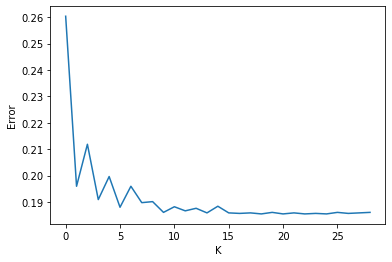

In [77]:
#plotting the error
x=range(len(error))
plt.plot(x,error)
plt.xlabel("K")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

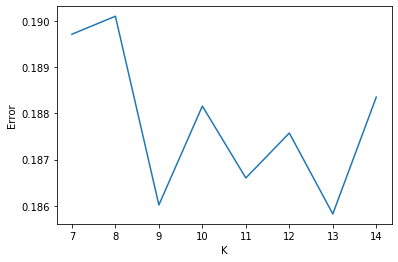

In [78]:
x=range(len(error))
plt.plot(x[7:15],error[7:15])
plt.xlabel("K")
plt.ylabel("Error")

So suitable value of k is 13

In [79]:
print("Score of model on test set in KNN is :",1-error[13])

Score of model on test set in KNN is : 0.8141747572815534


In [80]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier as DT
dt=DT()
dt.fit(train_x,train_y)
print("Score of model on train set in DT is :",dt.score(train_x,train_y))

Score of model on train set in DT is : 1.0


In [81]:
print("Score of model on train set in DT is :",dt.score(test_x,test_y))

Score of model on train set in DT is : 0.7844660194174757


In [82]:
#finding the best value of max depth
score=[]
for i in range(1,30):
    dt=DT(max_depth=i)
    dt.fit(train_x,train_y)
    score.append(dt.score(test_x,test_y))

Text(0, 0.5, 'Score')

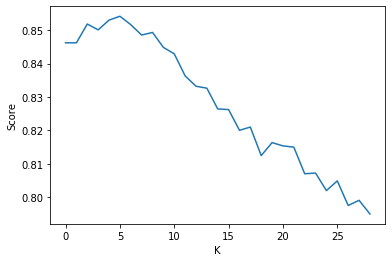

In [83]:
#plotting the score
x=range(len(score))
plt.plot(x,score)
plt.xlabel("K")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

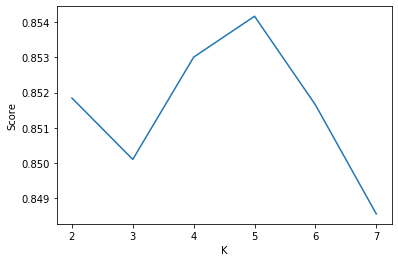

In [84]:
x=range(len(score))
plt.plot(x[2:8],score[2:8])
plt.xlabel("K")
plt.ylabel("Score")

Suitable value of max_depth is 5

In [85]:
print("Score of model on test set in DT is :",score[5])

Score of model on test set in DT is : 0.8541747572815533


#### Implementing ensamble modelling

In [86]:
lr_predict=lr.predict(test_x)
lr_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [87]:
dt_predict=dt.predict(test_x)
dt_predict[:20]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [88]:
knn_predict=knn.predict(test_x)
knn_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [89]:
from statistics import mode
final_predict=[]
for i in range(len(test_x)):
    final_predict.append(mode([lr_predict[i],dt_predict[i],knn_predict[i]]))

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy score of lr model is :",accuracy_score(test_y,lr_predict))
print("Accuracy score of knn model is :",accuracy_score(test_y,knn_predict))
print("Accuracy score of dt model is :",accuracy_score(test_y,dt_predict))
print("Accuracy score of Ensemble model is :",accuracy_score(test_y,final_predict))

Accuracy score of lr model is : 0.8145631067961165
Accuracy score of knn model is : 0.8139805825242719
Accuracy score of dt model is : 0.7949514563106796
Accuracy score of Ensemble model is : 0.8147572815533981


Accuracy score of ensemble model is same as lr model